<a href="https://colab.research.google.com/github/MRamsey28/Astro1221/blob/main/Income_vs_educationMvsW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fitting a linear relationship between education and income level, data are from: https://nces.ed.gov/programs/coe/indicator/cba/annual-earnings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[Click here for the data that we are fitting below](http://nces.ed.gov/programs/coe/indicator/cba/annual-earnings?utm_source=coe_share&utm_medium=figure_tool&utm_campaign=copied_url#2)

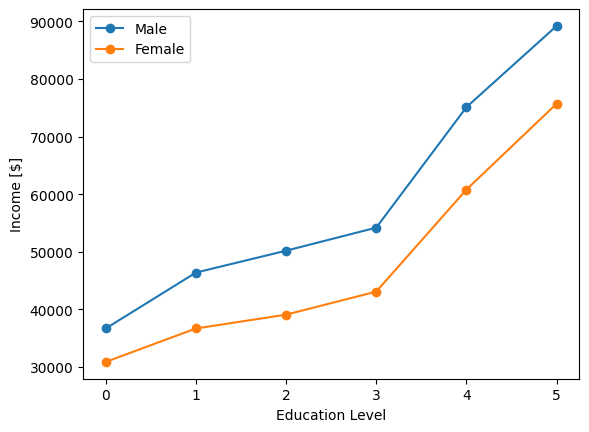

In [ ]:
MIncome_arr = np.array([36700., 46400., 50200., 54200., 75100., 89200.])
MEducation_arr = np.arange(len(MIncome_arr))
WIncome_arr = np.array([30900., 36700., 39100., 43100., 60800., 75700])
WEducation_arr = np.arange(len(WIncome_arr))
plt.plot(MEducation_arr,MIncome_arr, "o-")
plt.plot(WEducation_arr,WIncome_arr, "o-")
plt.legend(["Male", "Female"])
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()

In [ ]:
# Extract the first column and remove the first one entry.
Education_levels = np.array([
"Less than high school completion",
"High school completion",
"Some college, no degree",
"Associate’s degree",
"Bachelor’s degree",
"Master’s or higher degree"
])

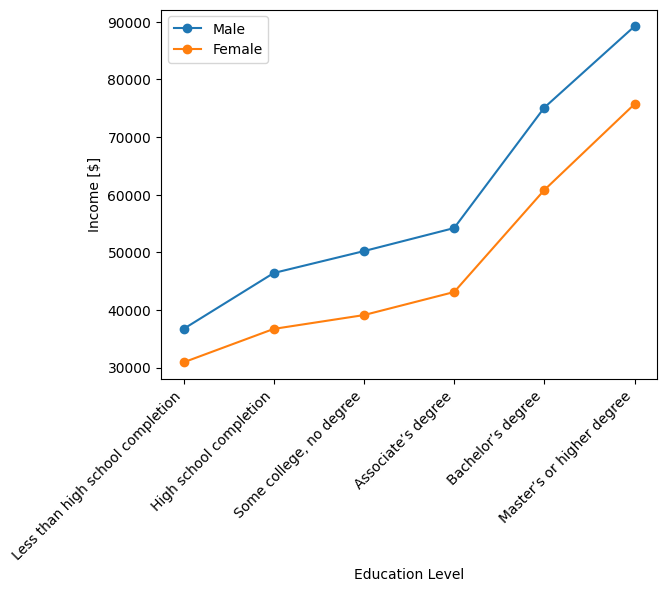

In [ ]:
# To make the figure more readable on the axis
plt.plot(MEducation_arr,MIncome_arr, "o-")
plt.plot(WEducation_arr,WIncome_arr, "o-")
plt.legend(["Male", "Female"])
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.xticks(MEducation_arr, Education_levels, rotation=45, ha="right")
plt.xticks(WEducation_arr, Education_levels, rotation=45, ha="right")
plt.show()

In [ ]:
Mz_linear = np.polyfit(MEducation_arr,MIncome_arr,1) # for Men first
# "income = z_linear[0] * level + z_linear[1]", where z_linear[0] represents the slope and z_linear[1] represents the y-intercept
print("M-Slope = ", Mz_linear[0], " in dollar per level")
print("Y-intercept = ", Mz_linear[1], " in dollar at level 0, i.e., Less than high school completion")
Wz_linear = np.polyfit(WEducation_arr,WIncome_arr,1) # for Women Second
# "income = z_linear[0] * level + z_linear[1]", where z_linear[0] represents the slope and z_linear[1] represents the y-intercept
print("W-Slope = ", Wz_linear[0], " in dollar per level")
print("Y-intercept = ", Wz_linear[1], " in dollar at level 0, i.e., Less than high school completion")

M-Slope =  10074.285714285712  in dollar per level
Y-intercept =  33447.61904761905  in dollar at level 0, i.e., Less than high school completion
W-Slope =  8579.999999999998  in dollar per level
Y-intercept =  26266.666666666653  in dollar at level 0, i.e., Less than high school completion


## How about fitting the data with second-order polynomial, i.e., a quadratic function?

In [ ]:
Mz_quadratic = np.polyfit(MEducation_arr,MIncome_arr,2)
print(Mz_quadratic)
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(Mz_quadratic[0], Mz_quadratic[1], Mz_quadratic[2]))

Wz_quadratic = np.polyfit(WEducation_arr,WIncome_arr,2)
print(Wz_quadratic)
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(Wz_quadratic[0], Wz_quadratic[1], Wz_quadratic[2]))
# Note the above line on the usage of {} for printing variables, and :.1f to control the printed number of siginifiant digits

[ 1614.28571429  2002.85714286 38828.57142857]
That is: Income = 1614.3 * level**2 + 2002.9 * level + 38828.6
[ 1905.35714286  -946.78571429 32617.85714286]
That is: Income = 1905.4 * level**2 + -946.8 * level + 32617.9


## Now which fit is better? Introducing $\chi^2$
## $\chi^2 = \Sigma\frac{(O_i - C_i)^2}{\sigma_i^2}$
## And reduced chi-squared statistic $\chi^2_\nu = \frac{\chi^2}{\nu}$, where O is observation, C is calculation, $\sigma$ is measurement error, and $\nu$ is the degree of freedom, which is n - m, where n is the number of data points used in fitting and m is the number of fitting parameters. For linear fitting, m = 2 because the two fitting parameters are slope and y-intercept. For quadratic fitting, m = 3. See more details here: https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic

## In general, we would like $\chi^2_\nu$ to be close to 1 but not too much bigger or smaller than 1.

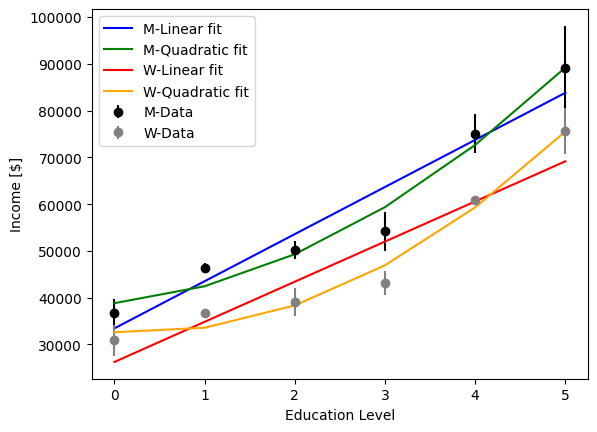

In [ ]:
# Plot the data and the two fits: linear and quadratic
# Rename some variables to be consistent with the above definition
MO = MIncome_arr
MO_err = np.array([3110, 1070, 2000, 4130, 4110, 8910]) # extract from the same figure with Confidence interval toggled on, and remove the first entry
MC_linear = Mz_linear[0] * MEducation_arr + Mz_linear[1]
MC_quadratic = Mz_quadratic[0] * MEducation_arr**2 + Mz_quadratic[1] * MEducation_arr + Mz_quadratic[2]

WO = WIncome_arr
WO_err = np.array([3310, 960, 3070, 2580, 860, 4940])
WC_linear = Wz_linear[0] * WEducation_arr + Wz_linear[1]
WC_quadratic = Wz_quadratic[0] * WEducation_arr**2 + Wz_quadratic[1] * WEducation_arr + Wz_quadratic[2]


MIncome_arr = np.array([36700., 46400., 50200., 54200., 75100., 89200.])
MEducation_arr = np.arange(len(MIncome_arr))
plt.errorbar(MEducation_arr, MO, yerr=MO_err, marker="o", linestyle = "None", color = "Black", label = "M-Data")
plt.plot(MEducation_arr,MC_linear, color = "Blue", label = "M-Linear fit")
plt.plot(MEducation_arr,MC_quadratic, color = "Green", label = "M-Quadratic fit")

WIncome_arr = np.array([30900., 36700., 39100., 43100., 60800., 75700])
WEducation_arr = np.arange(len(WIncome_arr))
plt.errorbar(WEducation_arr, WO, yerr=WO_err, marker="o", linestyle = "None", color = "Grey", label = "W-Data")
plt.plot(WEducation_arr,WC_linear, color = "red", label = "W-Linear fit")
plt.plot(WEducation_arr,WC_quadratic, color = "orange", label = "W-Quadratic fit")
plt.legend()
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()

## Let's calculate reduced Chi2, i.e., $\chi^2_\nu$ , for the two fits

In [ ]:
Mn = len(MO)
Mm_linear = 2
Mm_quadratic = 3
Mre_chi2_linear = np.sum((MO - MC_linear)**2 / MO_err**2) / (Mn - Mm_linear)
print("Men Reduced Chi2 for linear fit = {:.2f}".format(Mre_chi2_linear))
Mre_chi2_quadratic = np.sum((MO - MC_quadratic)**2 / MO_err**2) / (Mn - Mm_quadratic)
print("Men Reduced Chi2 for quadratic fit = {:.2f}".format(Mre_chi2_quadratic))

Wn = len(WO)
Wm_linear = 2
Wm_quadratic = 3
Wre_chi2_linear = np.sum((WO - WC_linear)**2 / WO_err**2) / (Wn - Wm_linear)
print("Women Reduced Chi2 for linear fit = {:.2f}".format(Wre_chi2_linear))
Wre_chi2_quadratic = np.sum((WO - WC_quadratic)**2 / WO_err**2) / (Wn - Wm_quadratic)
print("Women Reduced Chi2 for quadratic fit = {:.2f}".format(Wre_chi2_quadratic))

Men Reduced Chi2 for linear fit = 4.24
Men Reduced Chi2 for quadratic fit = 5.42
Women Reduced Chi2 for linear fit = 5.35
Women Reduced Chi2 for quadratic fit = 5.36


In [ ]:
print((MO - MC_linear)**2 / MO_err**2)

print((WO - WC_linear)**2 / WO_err**2)

[1.09365927 7.23507049 2.88352744 5.25827784 0.10872954 0.36472278]
[ 1.95943609  3.72704475  1.98623269 11.91765986  0.06153476  1.74910441]


In [ ]:
print((MO - MC_quadratic)**2 / MO_err**2)
np.set_printoptions(suppress=True)
print((MO - MC_quadratic)**2 / MO_err**2)

print((WO - WC_quadratic)**2 / WO_err**2)
np.set_printoptions(suppress=True)
print((WO - WC_quadratic)**2 / WO_err**2)


[ 0.46844184 13.65741594  0.20637551  1.5644463   0.34997691  0.        ]
[ 0.46844184 13.65741594  0.20637551  1.5644463   0.34997691  0.        ]
[ 0.2693507  10.58669539  0.06036636  2.19879962  2.97591155  0.00135947]
[ 0.2693507  10.58669539  0.06036636  2.19879962  2.97591155  0.00135947]
